# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [392]:
# Your code here
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
#from scipy.stats import chi2_contingency
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [393]:
data = pd.read_csv("../data/boston_data.csv")
#data.isnull()
missing_values = data[data.isnull().any(axis=1) == True]
missing_values# there are no missing values 
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [394]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [395]:
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# df[np.abs(df.Data-df.Data.mean()) <= (3*df.Data.std())]
# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
data.corr().sort_values(by=['medv'])[:5]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
lstat,0.428940,-0.412075,0.608309,-0.041061,0.587573,-0.578025,0.602001,-0.500912,0.499279,0.542732,0.351408,-0.388913,1.000000,-0.742695
ptratio,0.292092,-0.371315,0.356549,-0.121835,0.166715,-0.323330,0.231820,-0.206016,0.487733,0.465997,1.000000,-0.194891,0.351408,-0.506313
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309,-0.501698
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732,-0.495792
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573,-0.439225


In [396]:
data.describe()["crim"] 

count    404.000000
mean       3.730912
std        8.943922
min        0.006320
25%        0.082382
50%        0.253715
75%        4.053158
max       88.976200
Name: crim, dtype: float64

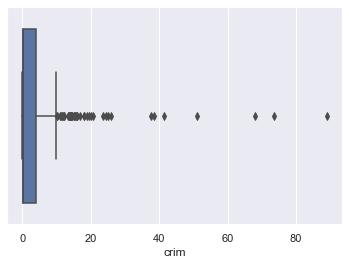

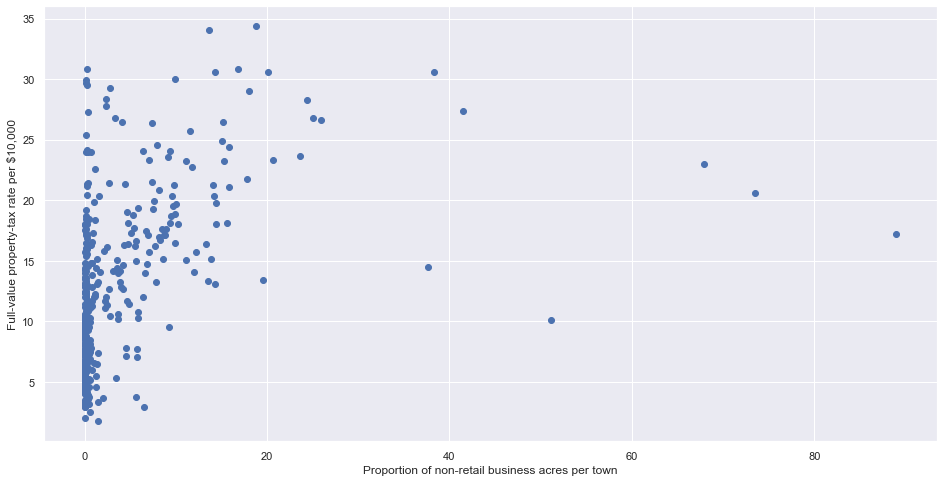

In [397]:
sns.boxplot(x=data['crim']) # there lost of outliers at the top 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['crim'], data['lstat'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show() # there are lots of outliers from the value of 30 with the corrolation between crim and lstat

In [398]:
#data[np.abs(data['crim']-data['crim'].mean()) <= (3*data['crim'].std())]

'''def outliers (dataset, column_name):
    dataset[np.abs(dataset[column_name]-dataset[column_name].mean()) <= (3*dataset[column_name].std())]
    return dataset
    
columns = list(data.columns)

data2 = outliers(data,'crim')

data2.describe()[-1:] # this shoes it does not work..''' 

# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
# the
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[data.columns.difference(['chas'])] < (Q1 - 1.5 * IQR))|(data[data.columns.difference(['chas'])] > (Q3 + 1.5 * IQR))).any(axis=1)]
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37,22.0
397,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
398,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81,16.6
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1


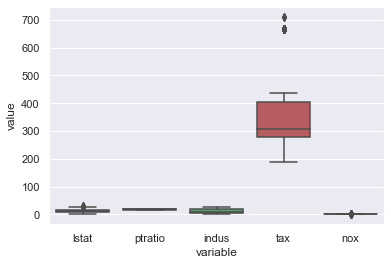

In [399]:
#sns.boxplot(x=data['crim']) # this shows the ourliers are now not bigger then 1.4 insetead of 80 

#data.boxplot()
sns.boxplot(x="variable", y="value", data=pd.melt(data[['lstat', 'ptratio', 'indus','tax','nox']]))
plt.show()

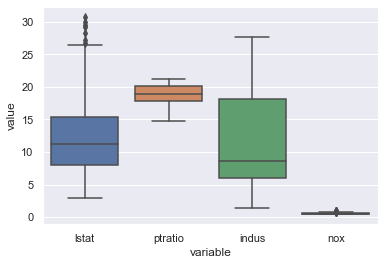

In [400]:
sns.boxplot(x="variable", y="value", data=pd.melt(data[['lstat', 'ptratio', 'indus','nox']]))

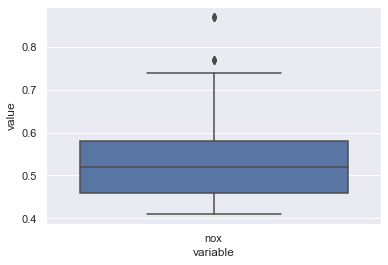

In [401]:
sns.boxplot(x="variable", y="value", data=pd.melt(data[['nox']]))

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

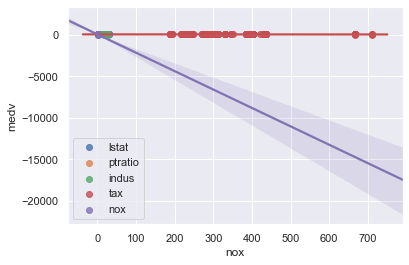

In [402]:
# Your plots here

'''
the tax has the wides spread, but not neceserry the biggest inpluence on the housing price, therfor we need to zoom in 

'''

ax = sns.regplot(x="lstat", y="medv", data=data, label="lstat")
ax = sns.regplot(x="ptratio", y="medv", data=data, label="ptratio")
ax = sns.regplot(x="indus", y="medv", data=data, label="indus")
ax = sns.regplot(x="tax", y="medv", data=data, label="tax")
ax = sns.regplot(x="nox", y="medv", data=data, label="nox")
ax.legend()


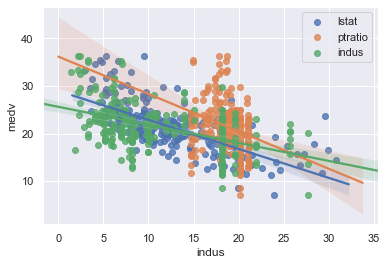

In [403]:
'''
https://nowosad.github.io/spData/reference/boston.html --> to find out what the meaning of the column names are 

LSTAT = a numeric vector of percentage values of lower status population
PTRATIO = a numeric vector of pupil-teacher ratios per town (constant for all Boston tracts)
INDUS = a numeric vector of proportions of non-retail business acres per town (constant for all Boston tracts)

lstat, pratio and indus are in the same corr scale iwth medv 
You can see the lower these valuses, the higher the housing prise is 
Ptratio has the bigges impact acording the regresion line, 
but beause the dots are clustered this regression line is not very 'reliable'

lsat and indus have a stronger | more recure regresion line 
because the dots are more spread and closer to the regresion line 
(the prediction error will be probably smaller here )

house price range = 15 - 35 

'''


ax = sns.regplot(x="lstat", y="medv", data=data, label="lstat") # x_estimator=np.mean,
ax = sns.regplot(x="ptratio", y="medv", data=data, label="ptratio")
ax = sns.regplot(x="indus", y="medv", data=data, label="indus")
ax.legend()

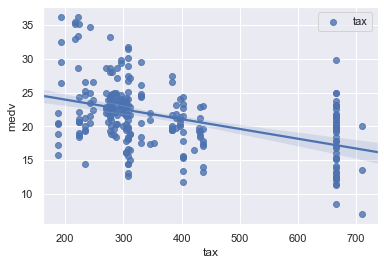

In [404]:
'''
TAX = a numeric vector full-value property-tax rate per USD 10,000 per town (constant for all Boston tracts)

Via the verstical lines, you can see that the tax is probably categorical (6, 21 % tax rate for example)
The plot shows, the lower the amound of tax, the higher the medv (property value)
which its understanable, the les tax the more buy bidjet will be left.

house price range = 15 - 35 

'''

ax = sns.regplot(x="tax", y="medv", data=data, label="tax")
ax.legend()

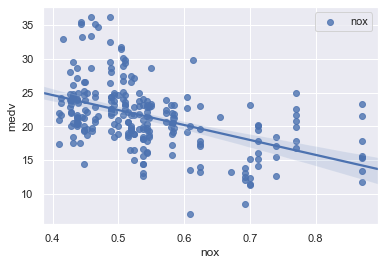

In [405]:
'''
NOX = a numeric vector of nitric oxides concentration (parts per 10 million) per town

the same categorical (mabey range binning) is the case here probaly 

the lower the nox polution the higher the housing price 

house price range = 15 - 35 

'''


ax = sns.regplot(x="nox", y="medv", data=data, label="nox")
ax.legend()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [406]:
# Your response here
# see axplanaition above directly with the plots 
data.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

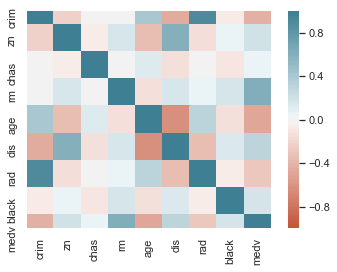

In [407]:
# Your response here


'''
only 'crim +', 'rm-' and 'age+' are poping out a litle bit 

RM  = a numeric vector of average numbers of rooms per dwelling
CRIM = a numeric vector of per capita crime
AGE = a numeric vector of proportions of owner-occupied units built prior to 1940

number of rooms i would expect to have a higher correlation. Because the more rooms, the more space is often the case
but mebey there is a tipping point, that after 4 or 5 rooms, the value of the probperty doe not rise so mutch any more 

Crime is a logoc one, the more crime the less attractive a neigbourhoud and therfor the prop prise will fall
but mabey the difference in crim ratio of the areas in boston is not that big and therefore the influes is also less big 
Bit it is remarcable it is a positive correlation... 

Ages is also logic, it might be the case the older a person gets, the more it earns or at least the more time 
there was to safe, 

'''

corr = data[['crim', 'zn', 'chas', 'rm', 'age', 'dis', 'rad', 'black', 'medv']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    #horizontalalignment='left'
);



### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [408]:
# Your code here
data.medv.describe()

count    246.000000
mean      21.492276
std        4.986461
min        7.000000
25%       18.825000
50%       21.400000
75%       23.900000
max       36.200000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [409]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # accuracy_score(y_predict, y_true)
    return r2_score(y_true, y_predict)
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [410]:
# Your code here
y = data["medv"]
X = data.drop(["medv"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

len(X_train)

196

In [411]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [412]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


model_2 = RandomForestRegressor(max_depth=2).fit(X_train, y_train)
model_4 = RandomForestRegressor(max_depth=4).fit(X_train, y_train)
model_6 = RandomForestRegressor(max_depth=6).fit(X_train, y_train)
model_8 = RandomForestRegressor(max_depth=8).fit(X_train, y_train)
model_10 = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
# extra models optimise the Bias and variance 
model_12 = RandomForestRegressor(max_depth=12).fit(X_train, y_train)
model_14 = RandomForestRegressor(max_depth=14).fit(X_train, y_train)
model_16 = RandomForestRegressor(max_depth=16).fit(X_train, y_train)
model_18 = RandomForestRegressor(max_depth=18).fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Now, plot the score for each tree on the training set and on the testing set.

In [413]:
# Produce a plot with the score for the testing and training for the different max depths

y_pred = model_2.predict(X_test)
len(y_pred)
len(y_train)
len(X_test)

50

In [414]:
y_train

151    19.6
67     22.4
181    15.2
37     29.0
100    26.6
       ... 
399    14.1
90     20.6
120    16.1
358    24.5
315    19.5
Name: medv, Length: 196, dtype: float64

In [415]:
print( 'model_2 R score is: ', r2_score(y_test, model_2.predict(X_test)))
print( 'model_4 R score is: ', r2_score(y_test, model_4.predict(X_test)))
print( 'model_6 R score is: ', r2_score(y_test, model_6.predict(X_test)))
print( 'model_8 R score is: ', r2_score(y_test, model_8.predict(X_test)))
print( 'model_10 R score is: ', r2_score(y_test, model_10.predict(X_test)))
# extra models optimise the Bias and variance 
print( 'model_12 R score is: ', r2_score(y_test, model_12.predict(X_test)))
print( 'model_14 R score is: ', r2_score(y_test, model_14.predict(X_test)))
print( 'model_16 R score is: ', r2_score(y_test, model_16.predict(X_test)))
print( 'model_18 R score is: ', r2_score(y_test, model_18.predict(X_test)))

model_2 R score is:  0.46467072432716017
model_4 R score is:  0.5973728802677056
model_6 R score is:  0.6750469366004084
model_8 R score is:  0.6329205639180581
model_10 R score is:  0.6297571923126934
model_12 R score is:  0.6505347051073416
model_14 R score is:  0.7456521723279445
model_16 R score is:  0.6147103413713568
model_18 R score is:  0.5973903766144145


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [384]:
# Your response here
# the more dept you have in the model the higher rthe R score | the better the model 

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [418]:
# Your response here
model_1 = RandomForestRegressor(max_depth=1).fit(X_train, y_train)
print( 'model_1 R score is: ', r2_score(y_test, model_1.predict(X_test)))

'''
the higher the max dept, the more precise you train your model 
So if the max dept is very high, you have a change for over fitting.

Bias and variance are correlated 
) the more exact you train the model (overfitting) the lower the bias, (no wrong trained dots) 
but lots of (wrong predictions) the more variance 
) et visa versa 

'''

model_1 R score is:  0.34288476870242335


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


'\nthe higher the max dept, the more precise you train your model \nSo if the max dept is very high, you have a change for over fitting.\n\nBias and variance are correlated \n) the more exact you train the model (overfitting) the lower the bias, (no wrong trained dots) \nbut lots of (wrong predictions) the more variance \n) et visa versa \n\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [417]:
# Your response here
# A dept of 8 till 12 would be an optimal range if you look at the outcomes of the traned models from 2 til 18 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [416]:
# Your response here
'''
1) How relevant today is data that was collected from 1978?

Not in the real numbers. Because of inflation and growing population, values will be out of date
bevertheles the important parameters, like tax, lstat, nox be still teh same
The tax and nox rates might have been changes, but the correlation values could be likely the same 



2) Are the features present in the data sufficient to describe a home?

Not qiet. It is representive for the quatitative features. The kwalitative feature, 
like light (this you can ale mesare with lumus models), style, charming details are more dificult to measure and 
translate in numeric or categorical values 


3) Is the model robust enough to make consistent predictions?
The more data the better. Now the model contains only 246 row. For the whole city this is to small to state
the model is robust



4) Would data collected in an urban city like Boston be applicable in a rural city?
No. other featires will be probably more important. 
The difference in feauture important can be revealed by combining the data set and make a prediction model 
to predict if the hous is in a rual or uban area. 

'''
data.shape

(246, 14)